<a href="https://colab.research.google.com/github/tonyjan02/idealnba/blob/main/cis1920final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIS 1920 Final Project

# Imports

In [37]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import json
import unittest
from google.colab import drive

In [38]:
!apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
24 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [39]:
#mounts google drive to import the kaggle.json file (kaggle requires login by drive or account)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# installing necessary module
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [42]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [43]:
# downloading specific dataset
!kaggle datasets download -d justinas/nba-players-data

nba-players-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [44]:
#unzipping dataset
!unzip /content/nba-players-data.zip

Archive:  /content/nba-players-data.zip
replace all_seasons.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: all_seasons.csv         


# Data Cleaner Class

In [45]:
# Custom DataCleaner Class with dunder methods
class DataCleaner:
    def __init__(self, data):
        # initializes a DataCleaner object
        self.data = data
    
    def __len__(self):
        # returns the length of dataset, with the length being the number of rows
        return len(self.data)
    
    def __str__(self):
        # returns a summary of the datacleaner instance with the length included
        return f"DataCleaner instance with size {len(self)}"
    
    def clean(self):
        # cleans the dataset with respect to the one we are using: drops, replaces, and cleans values
        cleaned_data = self.data.drop(columns={"Unnamed: 0", "college"})
        cleaned_data = cleaned_data.dropna(axis=1)
        cleaned_data.loc[cleaned_data["draft_round"] == "Undrafted", "draft_round"] = 3
        cleaned_data.loc[cleaned_data["draft_number"] == "Undrafted", "draft_number"] = 60
        cleaned_data["draft_round"] = cleaned_data["draft_round"].astype(int)
        cleaned_data["draft_number"] = cleaned_data["draft_number"].astype(int)
        self.data = cleaned_data
        return DataCleaner(cleaned_data)

# Cleaning + Pre-processing

In [46]:
# reading in file from kaggle to a dataframe
players_df = pd.read_csv("all_seasons.csv")
players_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [47]:
# looking at columns to learn which ones to drop
players_df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [48]:
# creating a DataCleaner instance and cleaning the dataset
players_cleaned_df = DataCleaner(players_df)
players_cleaned_df = players_cleaned_df.clean()
len(players_cleaned_df)

12305

In [49]:
# checking to see that method has properly worked, getting summary of instance
str(players_cleaned_df)

'DataCleaner instance with size 12305'

In [50]:
# looking at datatypes of columns to see which ones need to be modified for EDA
players_cleaned_df.data.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
country               object
draft_year            object
draft_round            int64
draft_number           int64
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

# Testing to Verify Success of Pre-processing

In [51]:
# Creating test class with cases
class Test(unittest.TestCase):

    def test_datatypes(self):
        # tests if draft column types were converted corretly
        self.assertEquals(players_cleaned_df.data["draft_number"].dtype, int)
        self.assertEquals(players_cleaned_df.data["draft_round"].dtype, int)

    def test_no_undrafted(self):
        # tests to check that there are no "Undrafted" values and that the values were successfully replaced
        self.assertEquals(len(players_cleaned_df.data[players_cleaned_df.data["draft_number"] == "Undrafted"]), 0)
        self.assertEquals(len(players_cleaned_df.data[players_cleaned_df.data["draft_round"] == "Undrafted"]), 0)

# running test cases
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

<ipython-input-51-7c9cb4b8dd93>:5: DeprecationWarning: Please use assertEqual instead.
  self.assertEquals(players_cleaned_df.data["draft_number"].dtype, int)
<ipython-input-51-7c9cb4b8dd93>:6: DeprecationWarning: Please use assertEqual instead.
  self.assertEquals(players_cleaned_df.data["draft_round"].dtype, int)
.<ipython-input-51-7c9cb4b8dd93>:9: DeprecationWarning: Please use assertEqual instead.
  self.assertEquals(len(players_cleaned_df.data[players_cleaned_df.data["draft_number"] == "Undrafted"]), 0)
<ipython-input-51-7c9cb4b8dd93>:10: DeprecationWarning: Please use assertEqual instead.
  self.assertEquals(len(players_cleaned_df.data[players_cleaned_df.data["draft_round"] == "Undrafted"]), 0)
.
----------------------------------------------------------------------
Ran 2 tests in 0.031s

OK


# Checking for Relevant Information

In [52]:
# creates and displays correlation matrix
corr_matrix = players_cleaned_df.data.corr()
corr_matrix

<ipython-input-52-feeb5277bebe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = players_cleaned_df.data.corr()


,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.008954,0.058544,0.001798,-0.032738,0.055218,0.008118,0.035623,0.090209,0.091746,-0.057147,0.018330,-0.119416,0.025175,0.066766
player_height,-0.008954,1.000000,0.825421,-0.153806,-0.177050,0.002202,-0.056564,0.423275,-0.449033,-0.002877,0.589485,0.614963,-0.104714,0.072154,-0.614631
player_weight,0.058544,0.825421,1.000000,-0.133480,-0.162255,0.019652,-0.026664,0.437930,-0.378784,0.004043,0.600643,0.607045,-0.067385,0.068142,-0.529440
draft_round,0.001798,-0.153806,-0.133480,1.000000,0.926278,-0.317607,-0.368558,-0.325339,-0.221983,-0.087205,-0.031334,-0.127998,-0.229993,-0.148311,-0.058857
draft_number,-0.032738,-0.177050,-0.162255,0.926278,1.000000,-0.329400,-0.438584,-0.391162,-0.266019,-0.095088,-0.037437,-0.158663,-0.272937,-0.152830,-0.078302
gp,0.055218,0.002202,0.019652,-0.317607,-0.329400,1.000000,0.539066,0.470948,0.385836,0.253262,-0.016396,0.067266,0.146806,0.375816,0.133982
pts,0.008118,-0.056564,-0.026664,-0.368558,-0.438584,0.539066,1.000000,0.624889,0.660949,0.218366,-0.123674,0.054804,0.638853,0.376571,0.332815
reb,0.035623,0.423275,0.437930,-0.325339,-0.391162,0.470948,0.624889,1.000000,0.241018,0.190940,0.407976,0.612226,0.230552,0.314569,-0.069771
ast,0.090209,-0.449033,-0.378784,-0.221983,-0.266019,0.385836,0.660949,0.241018,1.000000,0.165098,-0.340600,-0.198130,0.392533,0.176083,0.802527
net_rating,0.091746,-0.002877,0.004043,-0.087205,-0.095088,0.253262,0.218366,0.190940,0.165098,1.000000,0.060166,0.051433,0.018866,0.316474,0.066176


# Displaying Findings

<Axes: >

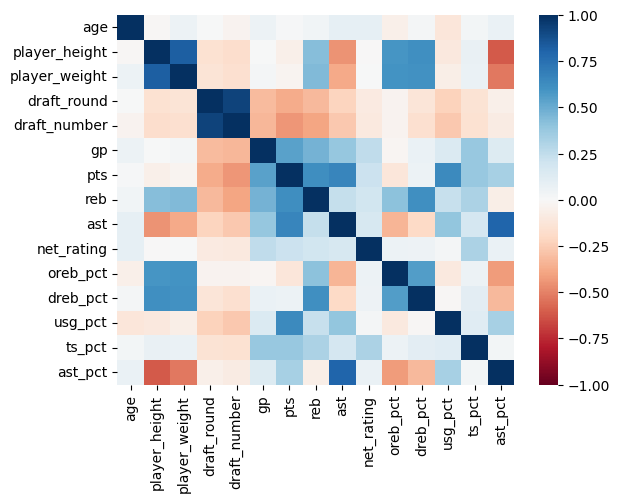

In [53]:
# creates and displays heatmap for dataset
heatmap = sns.heatmap(data = corr_matrix, cmap = "RdBu", vmin = -1, vmax = 1)
heatmap

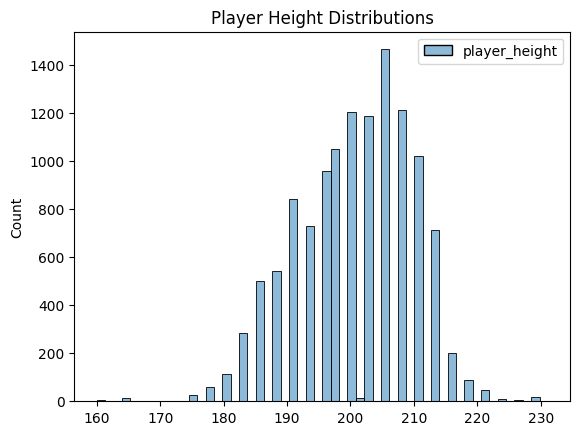

In [54]:
# creates historgram plot to look at player height distributions 
plot_height = sns.histplot(players_cleaned_df.data[["player_height"]]).set(title = "Player Height Distributions")

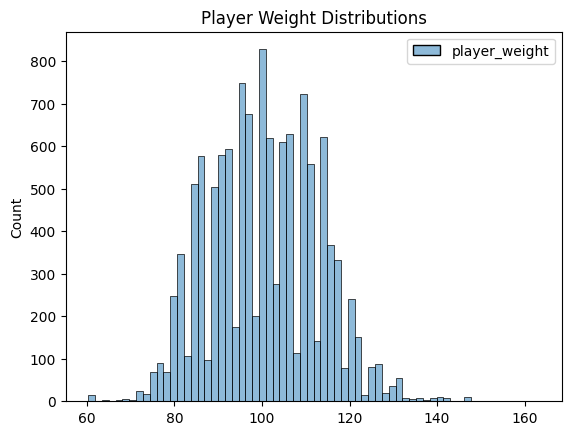

In [55]:
# creates historgram plot to look at player weight distributions 
plot_weight = sns.histplot(players_cleaned_df.data[["player_weight"]]).set(title = "Player Weight Distributions")

In [56]:
# displays data after processing and cleaning
players_cleaned_df.data

,player_name,team_abbreviation,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32.0,205.74,111.130040,USA,2011,1,13,17,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,Markelle Fultz,ORL,24.0,193.04,94.800728,USA,2017,1,1,18,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,Marcus Smart,BOS,28.0,193.04,99.790240,USA,2014,1,6,71,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,USA,Undrafted,3,60,12,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


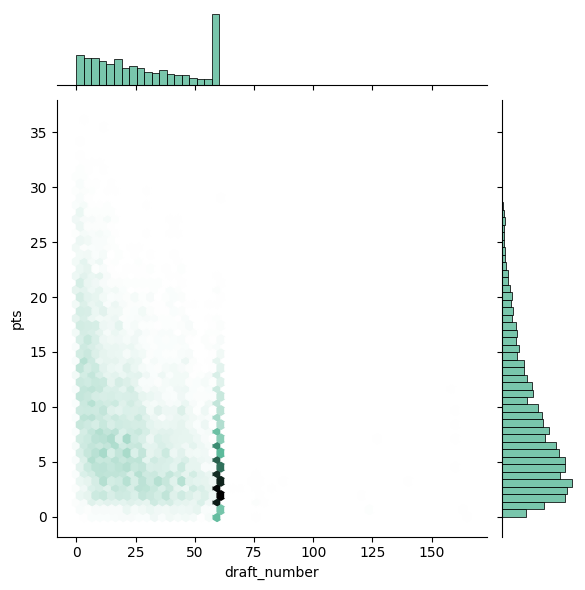

In [57]:
# graphing draft number vs. points
draft_points_plot = sns.jointplot(x=players_cleaned_df.data["draft_number"], y=players_cleaned_df.data["pts"], kind="hex", color="#4CB391")


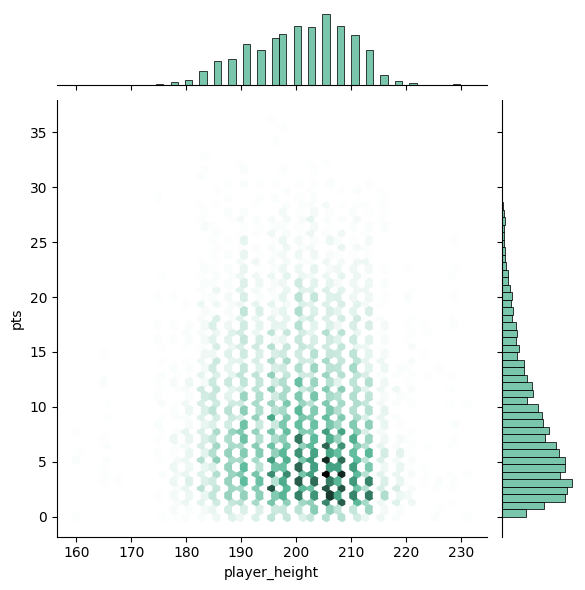

In [58]:
# graphing height vs. points
height_points_plot = sns.jointplot(x=players_cleaned_df.data["player_height"], y=players_cleaned_df.data["pts"], kind="hex", color="#4CB391")


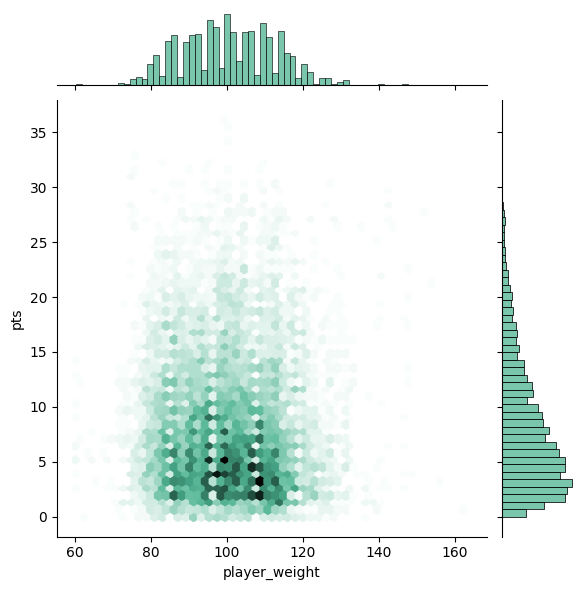

In [59]:
# graphing weight vs. points
weight_points_plot = sns.jointplot(x=players_cleaned_df.data["player_weight"], y=players_cleaned_df.data["pts"], kind="hex", color="#4CB391")
